# Cargue de Librerias y información
En este proyecto vamos a usar las siguientes librerias.
###### pandas -> para la manipulacion de los datos.
###### requests -> para hacer peticiones a el servidor de github.
###### json -> para cargar datos en formato Json.
###### matplotlib -> para hacer graficos
###### heapq ->  Permite generar, algoritmos para organizar la información.
###### networkx -> Herramienta para el uso y estudio de Grafos


In [4]:
#Cargue de las librerias
import pandas as pd
import heapq
import requests as rq
import json
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
url = 'https://raw.githubusercontent.com/shecho30/IA/main/Actividad%20Corte%20II/DataSet_Barrios_Cali.json'
url2 = 'https://raw.githubusercontent.com/shecho30/IA/main/Actividad%20Corte%20II/datos_ia.csv'

In [28]:
df = pd.read_csv(url2, sep=';')

In [29]:
df

,Id,barrio,barrio cercano,cuadra,barrio cercano II,cuadra II
0,1,panamericano,san judas,6,guabal,4
1,2,guabal,dorado,5,panamericano,7
2,3,san judas,primero de mayo,5,panamericano,5
3,4,primero de mayo,san judas,3,el diamante,5
4,5,dorado,guabal,6,santo domingo,7
5,6,el diamante,republica,9,primero de mayo,8
6,7,santo domingo,dorado,4,Los guaduales,10
7,8,republica,La hacienda,5,el diamante,6
8,9,La hacienda,los alamos,7,republica,6
9,10,Los guaduales,santo domingo,6,la base,8


In [13]:
response = rq.get(url).text

In [30]:
datos = json.loads(response)

In [31]:
datos

{'panamericano': {'san judas': 6, 'guabal': 4},
 'guabal': {'dorado': 5, 'panamericano': 7},
 'san judas': {'primero de mayo': 5, 'panamericano': 5},
 'primero de mayo': {'san judas': 3, 'el diamante': 5},
 'dorado': {'guabal': 6, 'santo domingo': 7},
 'el diamante': {'republica': 9, 'primero de mayo': 8},
 'santo domingo': {'dorado': 4, 'Los guaduales': 10},
 'republica': {'La hacienda': 5, 'el diamante': 6},
 'La hacienda': {'los alamos': 7, 'republica': 6},
 'Los guaduales': {'santo domingo': 6, 'la base': 8},
 'vallado': {'san judas': 3, 'guabal': 4},
 'ciudad cordoba': {'primero de mayo': 7, 'vallado': 4},
 'La flora': {'dorado': 6, 'ciudad cordoba': 4},
 'colon': {'panamericano': 2, 'vallado': 4}}

# Exploracion de datos

In [33]:
df.head()

,Id,barrio,barrio cercano,cuadra,barrio cercano II,cuadra II
0,1,panamericano,san judas,6,guabal,4
1,2,guabal,dorado,5,panamericano,7
2,3,san judas,primero de mayo,5,panamericano,5
3,4,primero de mayo,san judas,3,el diamante,5
4,5,dorado,guabal,6,santo domingo,7


In [36]:
df.describe()

,Id,cuadra,cuadra II
count,14.0000,14.000000,14.000000
mean,7.5000,5.285714,5.857143
std,4.1833,1.857565,1.915810
min,1.0000,2.000000,4.000000
25%,4.2500,4.250000,4.000000
50%,7.5000,5.500000,5.500000
75%,10.7500,6.000000,7.000000
max,14.0000,9.000000,10.000000


In [56]:
df.shape

(14, 6)

Text(0.5, 1.0, 'Cantidad de cuadras')

<Figure size 1440x720 with 0 Axes>

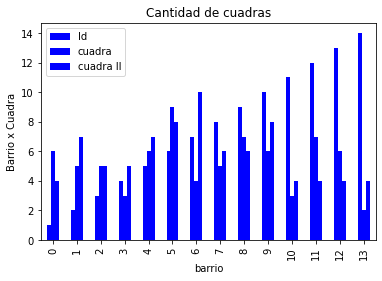

In [59]:
plt.figure(figsize=(20,10))
df.plot(kind='bar', color='blue')
plt.xlabel('barrio')
plt.ylabel('Barrio x Cuadra')
plt.title('Cantidad de cuadras')

In [10]:
def ia_ruta(data, inicio, final):
    queue, visited = [(0, inicio, [])], set()
    heapq.heapify(queue) #ordenar los datos
    
    while queue:
        (cost, node, path) = heapq.heappop(queue) #Extrae el dato mas pequeño
        
        if node not in visited:
            visited.add(node)
            path = path + [node]
            
            if node == final:
                return cost, path
            
            for neighbor, c in data[node].items():
                if neighbor not in visited:
                    heapq.heappush(queue, (cost + c, neighbor, path)) #agrega la informacion al grafo
    
    return float("inf"), []

In [73]:
barria_salida = 'guabal' 
barrio_llegada = 'san judas'


cost, path = ia_ruta(datos, barria_salida, barrio_llegada)
print("La ruta más corta desde el barrio %s hasta el barrio %s es: " %(barria_salida,barrio_llegada))
print(path)
print("Cantidad de cuadras recorridas: ", cost)

La ruta más corta desde el barrio guabal hasta el barrio san judas es: 
['guabal', 'panamericano', 'san judas']
Cantidad de cuadras recorridas:  13


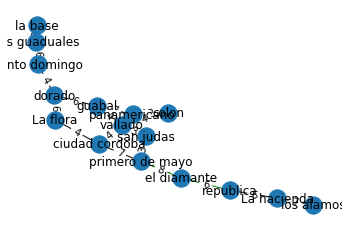

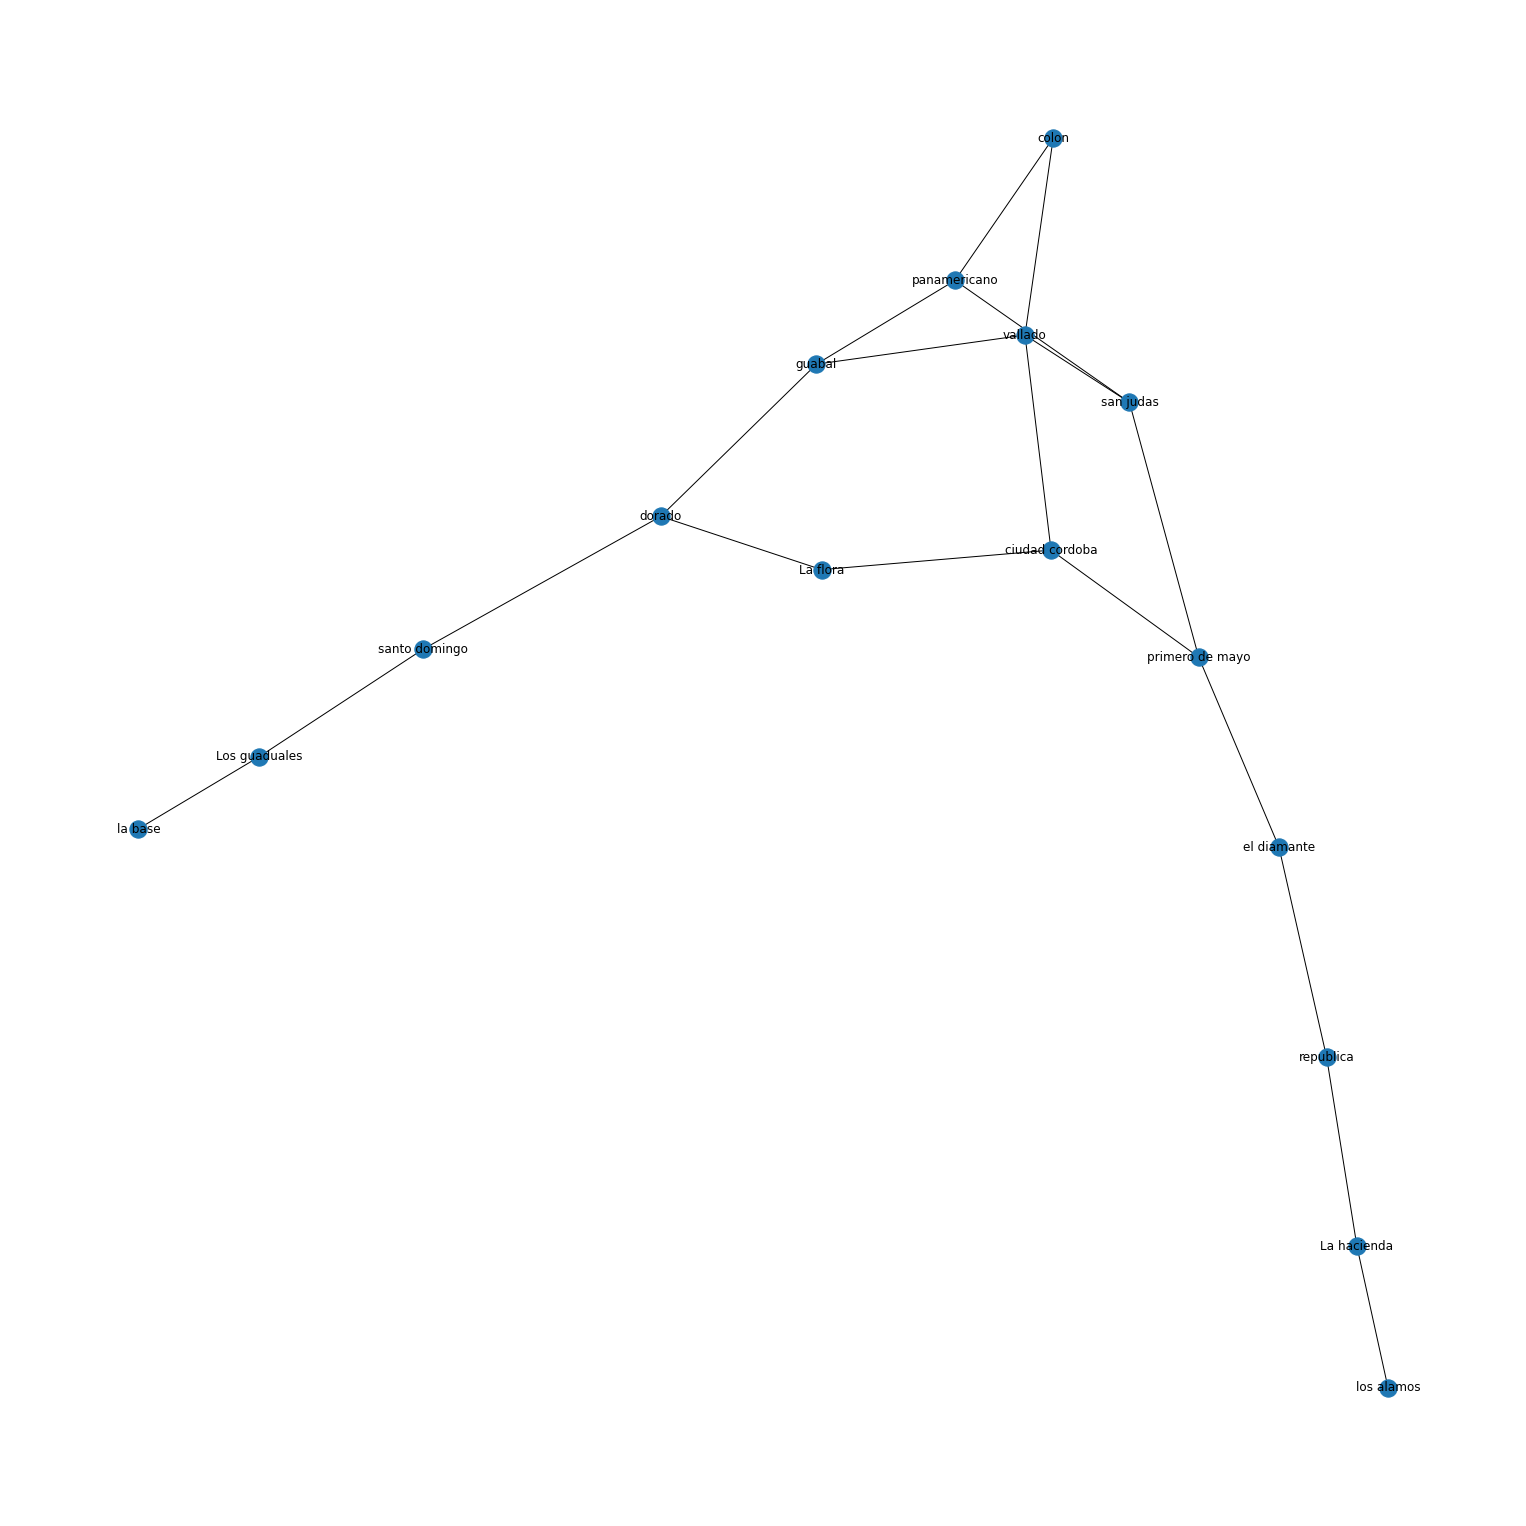

In [64]:
graph = datos

# Creamos el grafo con NetworkX
G = nx.Graph()
for node in graph:
    G.add_node(node)
    for neighbor, cost in graph[node].items():
        G.add_edge(node, neighbor, weight=cost)

# Calculamos el camino más corto utilizando la funcion de Dijkstra
cost, path = ia_ruta(graph, barria_salida, barrio_llegada)

# El camino mas corto va a estar de otro color
blue_edges = list(zip(path, path[1:]))
edge_colors = ['g' if edge in blue_edges else 'k' for edge in G.edges()]

# Dibujamos el grafo
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.axis('off')
plt.figure(figsize=(21, 21))
nx.draw(G, with_labels=True)
plt.show()



In [74]:
# Imprimimos el resultado
print("La ruta más corta desde el barrio %s hasta el barrio %s es: " %(barria_salida,barrio_llegada))
print(path)
print("Cantidad de cuadras recorridas: ", cost)

La ruta más corta desde el barrio guabal hasta el barrio san judas es: 
['guabal', 'panamericano', 'san judas']
Cantidad de cuadras recorridas:  13


In [69]:
df

,Id,barrio,barrio cercano,cuadra,barrio cercano II,cuadra II
0,1,panamericano,san judas,6,guabal,4
1,2,guabal,dorado,5,panamericano,7
2,3,san judas,primero de mayo,5,panamericano,5
3,4,primero de mayo,san judas,3,el diamante,5
4,5,dorado,guabal,6,santo domingo,7
5,6,el diamante,republica,9,primero de mayo,8
6,7,santo domingo,dorado,4,Los guaduales,10
7,8,republica,La hacienda,5,el diamante,6
8,9,La hacienda,los alamos,7,republica,6
9,10,Los guaduales,santo domingo,6,la base,8
